In [38]:
# melakukan import libray
import matplotlib.pyplot as plt 
import numpy as np
import cv2 as cv
import math

(256, 256)

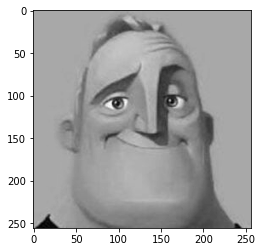

In [39]:
image = plt.imread('img/inc.jpg')
gbr = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gbr, cmap='gray')
gbr.shape

# 1. TRANSLASI

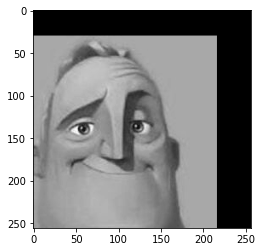

In [40]:
trans = np.zeros(gbr.shape)
def translation(image, result, x, y):
    for i in range(image.shape[1]):
        for j in range(image.shape[0]):
            xBaru = i - x
            yBaru = j - y
            if(xBaru >= image.shape[0] or yBaru >= image.shape[1] or xBaru <0 or yBaru < 0):
                result[j, i] = 0
            else:
                result[j, i] = image[yBaru][xBaru]

    plt.imshow(trans, cmap='gray')

translation(gbr, trans, -40, 30)
    # print(trans.shape)

# 2. ROTASI

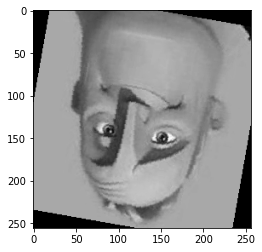

In [41]:
def rotate (img, degree):
    # set center gambar dimana
    # itung rumus, menggunakan center baru jadi x dan y akan dikurangi dengan koordinat center
    # balik lagi centernya ke 0 0 awal
    # petakan ke array baru;

    rotation_amount_degree = degree

    rotation_amount_rad = rotation_amount_degree * np.pi / 180.0
    height, width = img.shape

    rotated_image = np.zeros(img.shape)
    rotated_height, rotated_width= rotated_image.shape

    mid_row = int( (rotated_height-1)/2 )
    mid_col = int( (rotated_width-1)/2 )

    for r in range(rotated_height):
        for c in range(rotated_width):
            y = (r-mid_col)*math.cos(rotation_amount_rad) + (c-mid_row)*math.sin(rotation_amount_rad)
            x = -(r-mid_col)*math.sin(rotation_amount_rad) + (c-mid_row)*math.cos(rotation_amount_rad)

            # newY = cos(angle)*y + sin(angle)*x
            # newX = - sin(angle)*y + cos(angle)*x 

            y += mid_col
            x += mid_row

            x = round(x)
            y = round(y)

            if (x >= 0 and y >= 0 and x < width and y < height):
                rotated_image[r][c] = img[y][x]

    return rotated_image
    
rotated = rotate (gbr,170)
plt.imshow(rotated, cmap ="gray")

<!-- 3. PENCERMINAN -->

# 3 PENCERMINAN TERHADAP SUMBU X dan Y

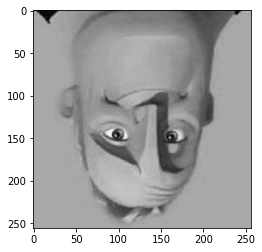

In [42]:
def flipX (image): # terhadap sumbu x
    mirror = np.zeros(image.shape)
    for i in range (image.shape[0]):
        for j  in range(image.shape[1]):
            mirror [i, j] = image[image.shape[1]-1-i, j]
    plt.imshow(mirror, cmap='gray')

flipX(gbr)

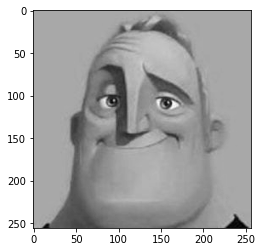

In [43]:
def flipY (image): # terhadap sumbu y
    mirror = np.zeros(image.shape)
    for i in range (image.shape[0]):
        for j  in range(image.shape[1]):
            mirror [i, j] = image[i, image.shape[0]-1-j]
    plt.imshow(mirror, cmap='gray')

flipY(gbr)

# 4. DILATASI

In [61]:
def dilate (image, skalar):
    heightNew = math.floor(image.shape[0] * skalar)
    weightNew = math.floor(image.shape[1] * skalar)

    result = np.zeros([heightNew, weightNew])

    for i in range (heightNew):
        for j in range (weightNew):
            xBefore = int(image.shape[0] * i / heightNew)
            yBefore = int(image.shape[1] * j / weightNew)
            result [i, j] = image[xBefore, yBefore]
    
    plt.imshow(result, cmap='gray')
    # return result.shape


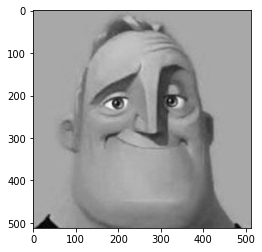

In [62]:
dilate(gbr, 2)

# 5. OPERASI CITRA

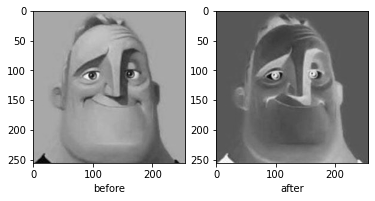

In [45]:
citraNegatif = np.zeros(gbr.shape)
fig = plt.figure(facecolor='white')
def operasiCitra (image, result):
    for i in range(image.shape[0]):
        for j in range (image.shape[1]):
            result[i,j] = 255 - image[i, j]
    fig.add_subplot(121)
    plt.imshow(image, cmap='gray')
    plt.xlabel("before")
    fig.add_subplot(122)
    plt.imshow(result, cmap='gray')
    plt.xlabel("after")
    
operasiCitra(gbr, citraNegatif)

<BarContainer object of 256 artists>

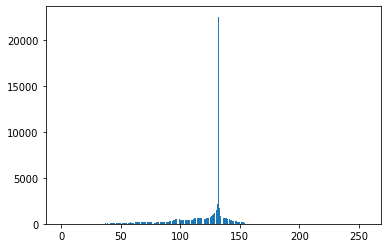

In [46]:
sumGray = np.zeros(gbr.shape[0]).astype(int)
for i in range (gbr.shape[0]):
    for j in range (gbr.shape[1]):
        val = gbr[i, j]
        sumGray [val] += 1

grayValue = [i for i in range (256)]
plt.bar(grayValue, sumGray)

<BarContainer object of 256 artists>

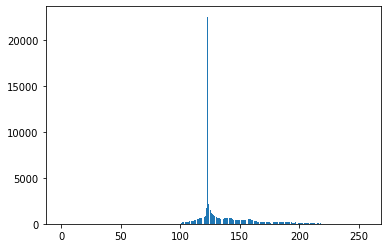

In [47]:
summm = np.zeros(citraNegatif.shape[0])
for i in range (citraNegatif.shape[0]):
    for j in range (citraNegatif.shape[1]):
        valll = int(citraNegatif[i, j])
        summm [valll] += 1

grayyy = [i for i in range (256)]

plt.bar(grayyy, summm)